In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
metadata=pd.read_csv('data/movies_data.csv')

# 数据预览

In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 442.2+ KB


In [4]:
metadata = metadata.reset_index() # 设置每部电影的编号
metadata.head()

index                                Name  Year  Duration  \
0      0  #Gadhvi (He thought he was Gandhi)  2019       109   
1      1                             #Yaaram  2019       110   
2      2                ...Aur Pyaar Ho Gaya  1997       147   
3      3                           ...Yahaan  2005       142   
4      4                  ?: A Question Mark  2012        82   

                       Genre  Rating  Votes        Director          Actor 1  \
0                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
1            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
2     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
3        Drama, Romance, War     7.4   1086  Shoojit Sircar  Jimmy Sheirgill   
4  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
0          Vivek Ghamande    Arvind Jangid  
1              Ishita Raj  Siddhant Kapoor  
2  Aishwarya Rai Bachchan    Shammi Kapoor  
3          Minissha Lamba   Yashpal Sharma  
4          Muntazir Ahmad     Kiran Bhatia

In [5]:
metadata.describe()

index         Year     Duration       Rating          Votes
count  5659.000000  5659.000000  5659.000000  5659.000000    5659.000000
mean   2829.000000  1996.247570   133.439124     5.898533    2697.649585
std    1633.756918    19.741839    25.319939     1.381165   13651.503584
min       0.000000  1931.000000    21.000000     1.100000       5.000000
25%    1414.500000  1983.000000   119.000000     5.000000      30.000000
50%    2829.000000  2002.000000   135.000000     6.100000     131.000000
75%    4243.500000  2013.000000   150.000000     6.900000     922.500000
max    5658.000000  2021.000000   321.000000    10.000000  591417.000000

# 数据分析

### 数据相关性

<AxesSubplot:>

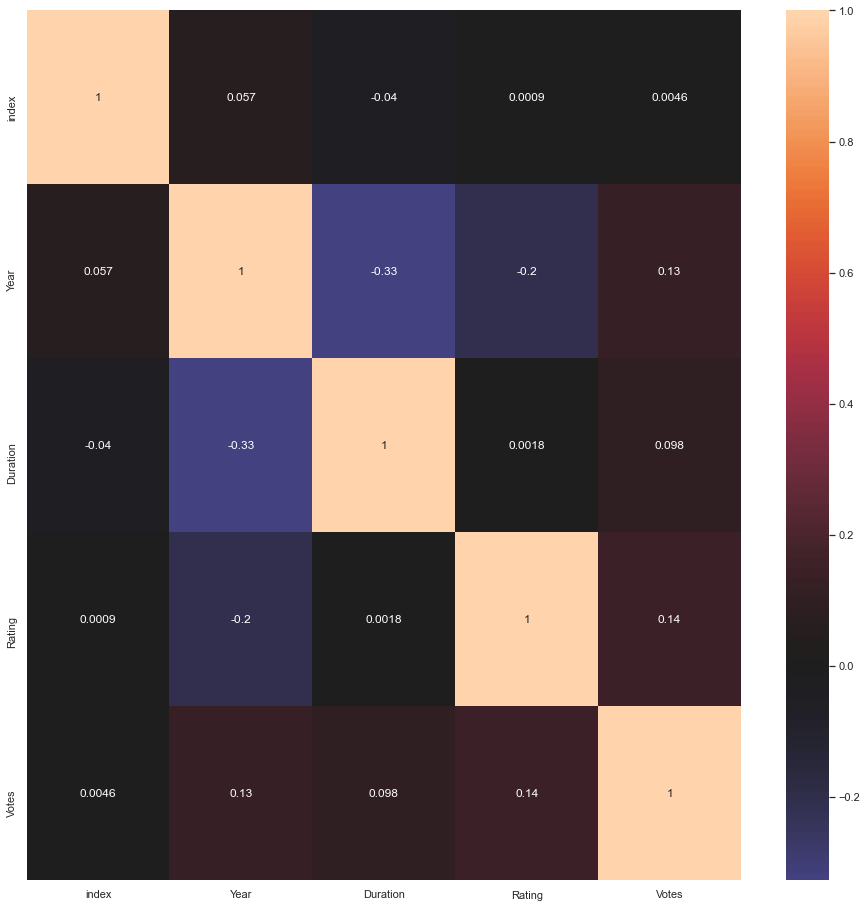

In [6]:
corrs = metadata.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrs,
             annot=True, # 注入数据
            center = 0)  # 绘制有色数据时将色彩映射居中的值)

### 不同年份电影的数量 

#### 获得相关数据

In [7]:
year_data=metadata.groupby(by='Year')

In [8]:
cnt=0    # 计数
dict1={} # 保存年份
dict2={} # 保存数量
dict3={} # 保存评分的平均分
dict4={} # 保存评分的最大值
dict5={} # 保存评分最大的电影的编号
for gp, data in year_data:
    cnt+=1
    dict1[cnt]=gp
    dict2[cnt]=data.shape[0]
    dict3[cnt]=np.mean(data['Rating'])
    dict4[cnt]=np.max(data['Rating'])
dict_={'year':dict1,'cnt':dict2,'means':dict3,'max':dict4}
movie_num_every_year=pd.DataFrame(dict_)

In [9]:
movie_num_every_year

year  cnt     means   max
1   1931    2  5.750000   6.2
2   1932    1  6.000000   6.0
3   1933    1  6.200000   6.2
4   1934    2  5.600000   8.5
5   1935    5  5.700000   7.4
..   ...  ...       ...   ...
87  2017  211  6.012796   9.0
88  2018  202  6.150495   9.3
89  2019  227  6.265198   9.4
90  2020  140  6.123571  10.0
91  2021   63  6.522222   9.7

[91 rows x 4 columns]

#### 每年电影的数量

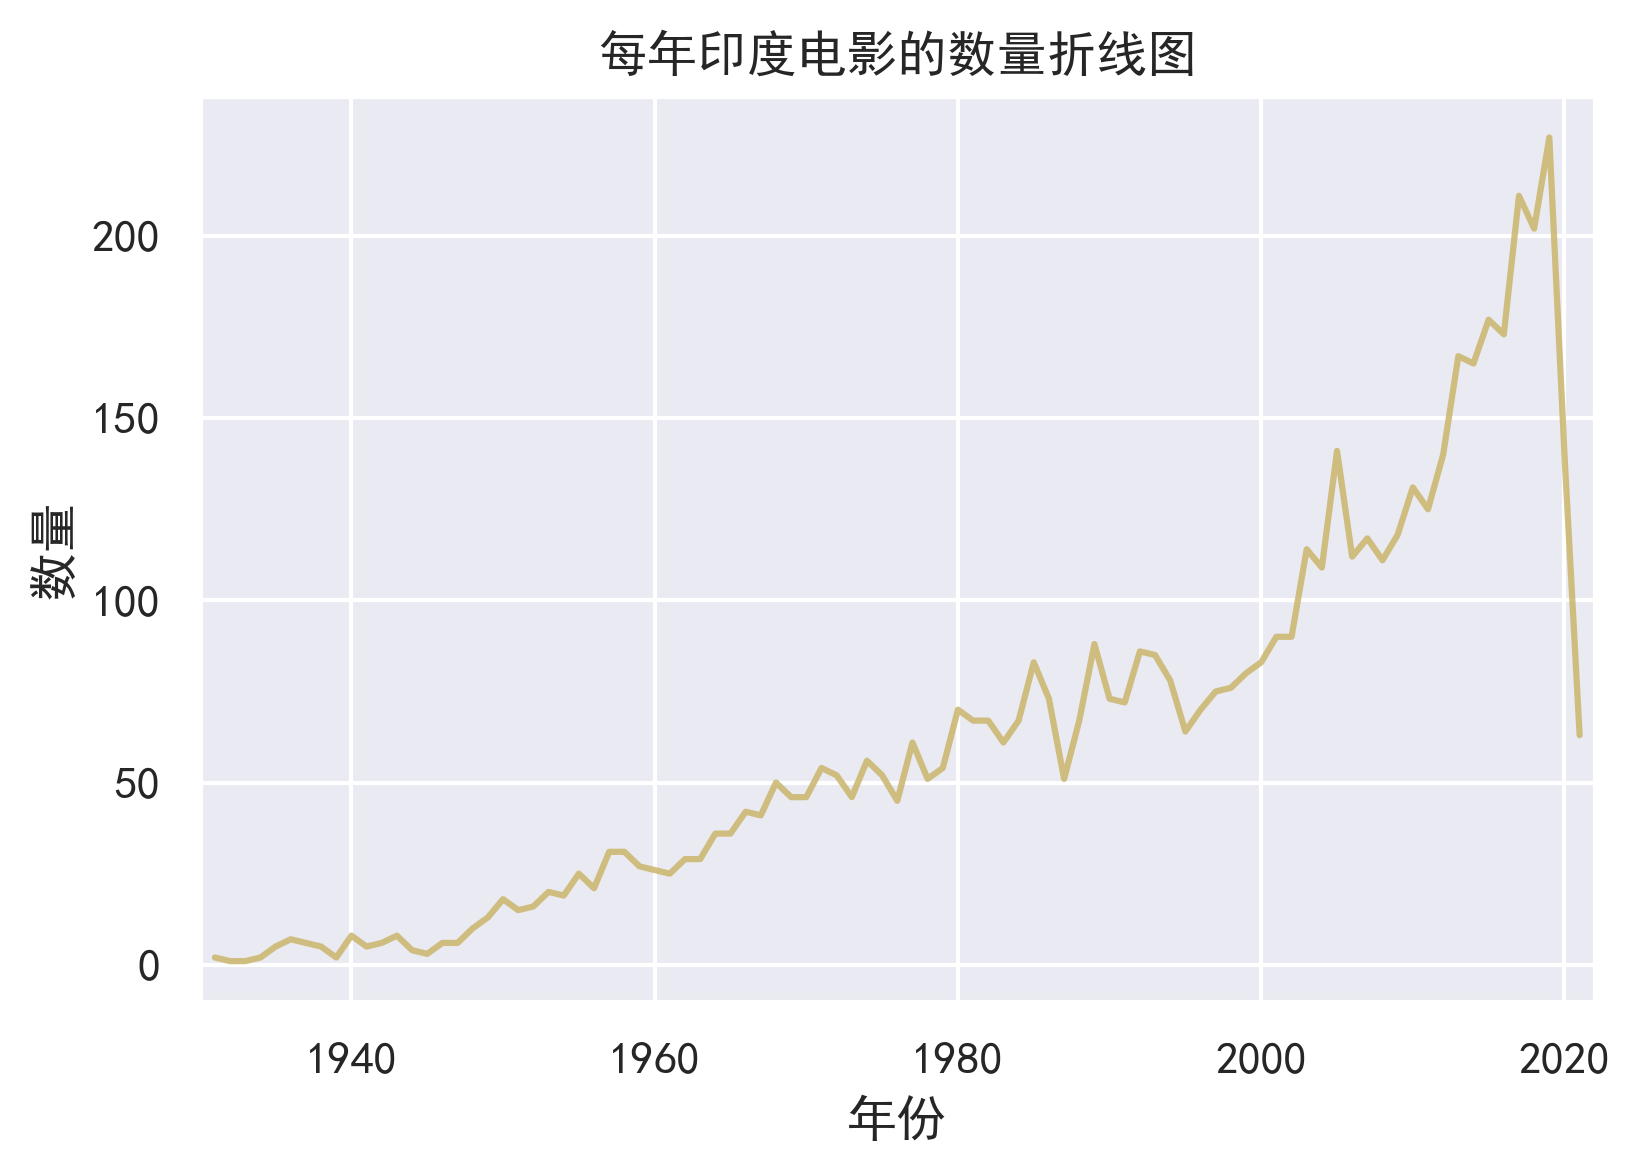

In [10]:
# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

fig= plt.figure(dpi=300)
plt.rcParams['savefig.dpi'] = 300 #图片像素
x=movie_num_every_year['year'].values
y1=movie_num_every_year['cnt'].values
plt.plot(x,y1,c='y',marker='',alpha=0.9)
plt.xlim(1930,2022)
plt.title("每年印度电影的数量折线图")
plt.xlabel("年份")
plt.ylabel("数量")
plt.savefig("每年电影数量.jpg")

#### 不同年份电影平均评分和最高评分

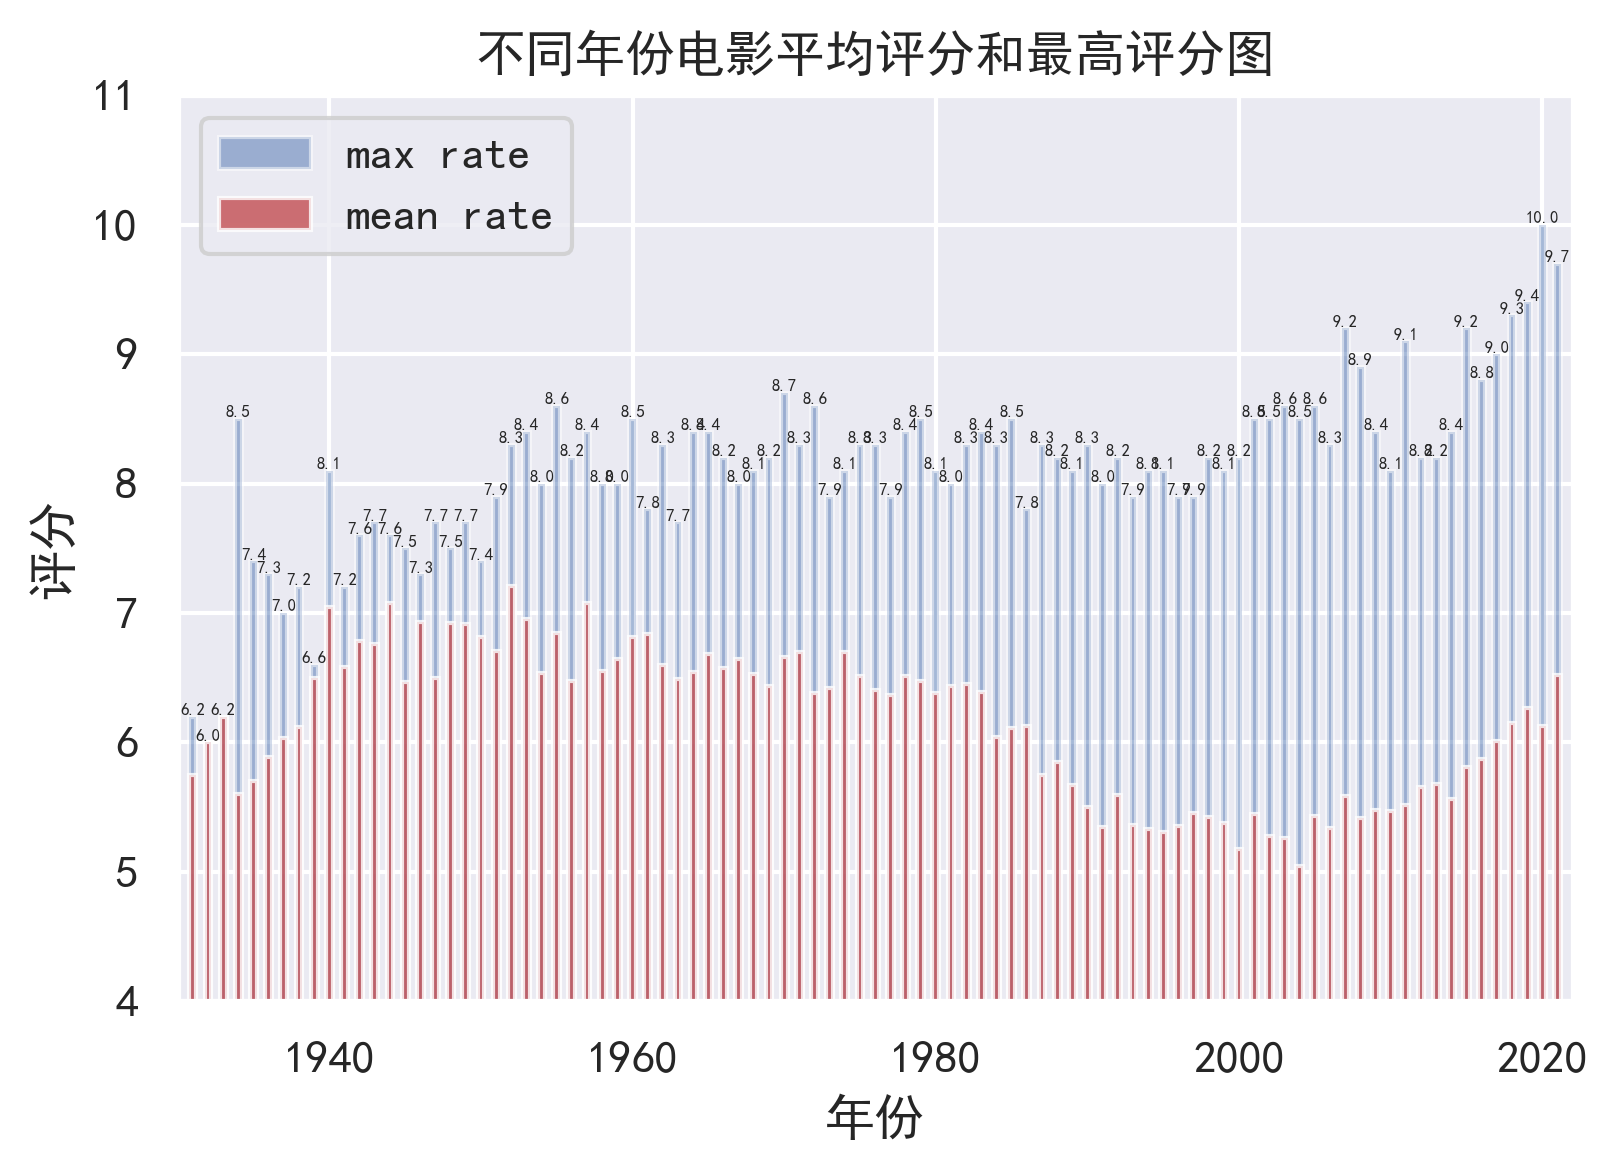

In [11]:
fig=plt.figure(dpi=300)
y2=movie_num_every_year['means'].values
y3=movie_num_every_year['max'].values
#条形图
plt.bar(x,y3,width = 0.45,align='center',color = 'b',alpha=0.5,label='max rate')
plt.bar(x,y2,width = 0.45,align='center',color = 'r',alpha=0.8,label='mean rate')
plt.ylim(4,11)
plt.xlim(1930,2022)
plt.xlabel('年份')
plt.ylabel('评分')
plt.title('不同年份电影平均评分和最高评分图')
plt.legend()
# 打印下方条形图的数据
for a,b in zip(x,y3):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=4)
#保存成图片
plt.savefig("不同年份电影平均评分和最高评分.jpg")


### top movies

In [12]:
dict_={}
for gp,data in year_data: # 获得数据
    data.sort_values(by=['Rating','Votes'],ascending=[False,False],inplace=True) # 排序：先以评分，再是投票
    dict_[gp]=data.iloc[0,:]
top_movies=pd.DataFrame(dict_)
top_movies = top_movies.T
top_movies.columns=metadata.columns

In [13]:
top_movies

index                    Name  Year Duration             Genre Rating  \
1931  5144  The Light of the World  1931      124    Drama, Fantasy    6.2   
1932  2293              Indrasabha  1932      211  Musical, Romance    6.0   
1933  1736                    Fate  1933       68    Drama, Romance    6.2   
1934  3366                 Mazdoor  1934      155             Drama    8.5   
1935  2299                Inquilab  1935      144             Drama    7.4   
...    ...                     ...   ...      ...               ...    ...   
2017  4319     Rediscovering India  2017      124       Documentary    9.0   
2018   536            Ashok Vatika  2018       97             Drama    9.3   
2019  1897            Gho Gho Rani  2019      105  History, Romance    9.4   
2020  3146         Love Qubool Hai  2020       94    Drama, Romance   10.0   
2021  2027              Half Songs  2021       79    Music, Romance    9.7   

     Votes                Director            Actor 1            Actor 2  \
1931   112          Ardeshir Irani      Master Vithal            Zubeida   
1932    12              J.J. Madan             Nissar    Jehanara Kajjan   
1933    12               John Hunt        Devika Rani       Himanshu Rai   
1934     6  Mohan Dayaram Bhavnani              Bibbo    S.B. Nayampalli   
1935    38             Debaki Bose        Durga Khote  Prithviraj Kapoor   
...    ...                     ...                ...                ...   
2017    62            Meenal Dixit         Benny John         Benny John   
2018     7           Rahul Mallick         Kunj Anand     Sanjay Bishnoi   
2019    47            Munni Pankaj  Nishi Neha Mishra       Pankaj Kamal   
2020     5         Saif Ali Sayeed          Ahaan Jha     Mahesh Narayan   
2021     7             Sriram Raja       Raj Banerjee    Emon Chatterjee   

                  Actor 3  
1931                Jillo  
1932  Abdul Rehman Kabuli  
1933       Abraham Sofaer  
1934         Paidi Jairaj  
1935        Syed Mohammed  
...                   ...  
2017         Meenal Dixit  
2018         Paras Zutshi  
2019          Akash Kumar  
2020  Rajasree Rajakumari  
2021    Purshottam Mulani  

[91 rows x 11 columns]

In [14]:
type_of_top_movies=dict() # 获得电影的类型及其相应的电影数量
for ty in top_movies['Genre'].values:
    ls=ty.split(', ') # 拆分字符串，获得电影类型
    for i in ls: # 记录
        if i in type_of_top_movies.keys():
            type_of_top_movies[i]+=1
        else:
            type_of_top_movies[i]=1
type_of_top_movies=pd.Series(type_of_top_movies) # 转化为Serise格式

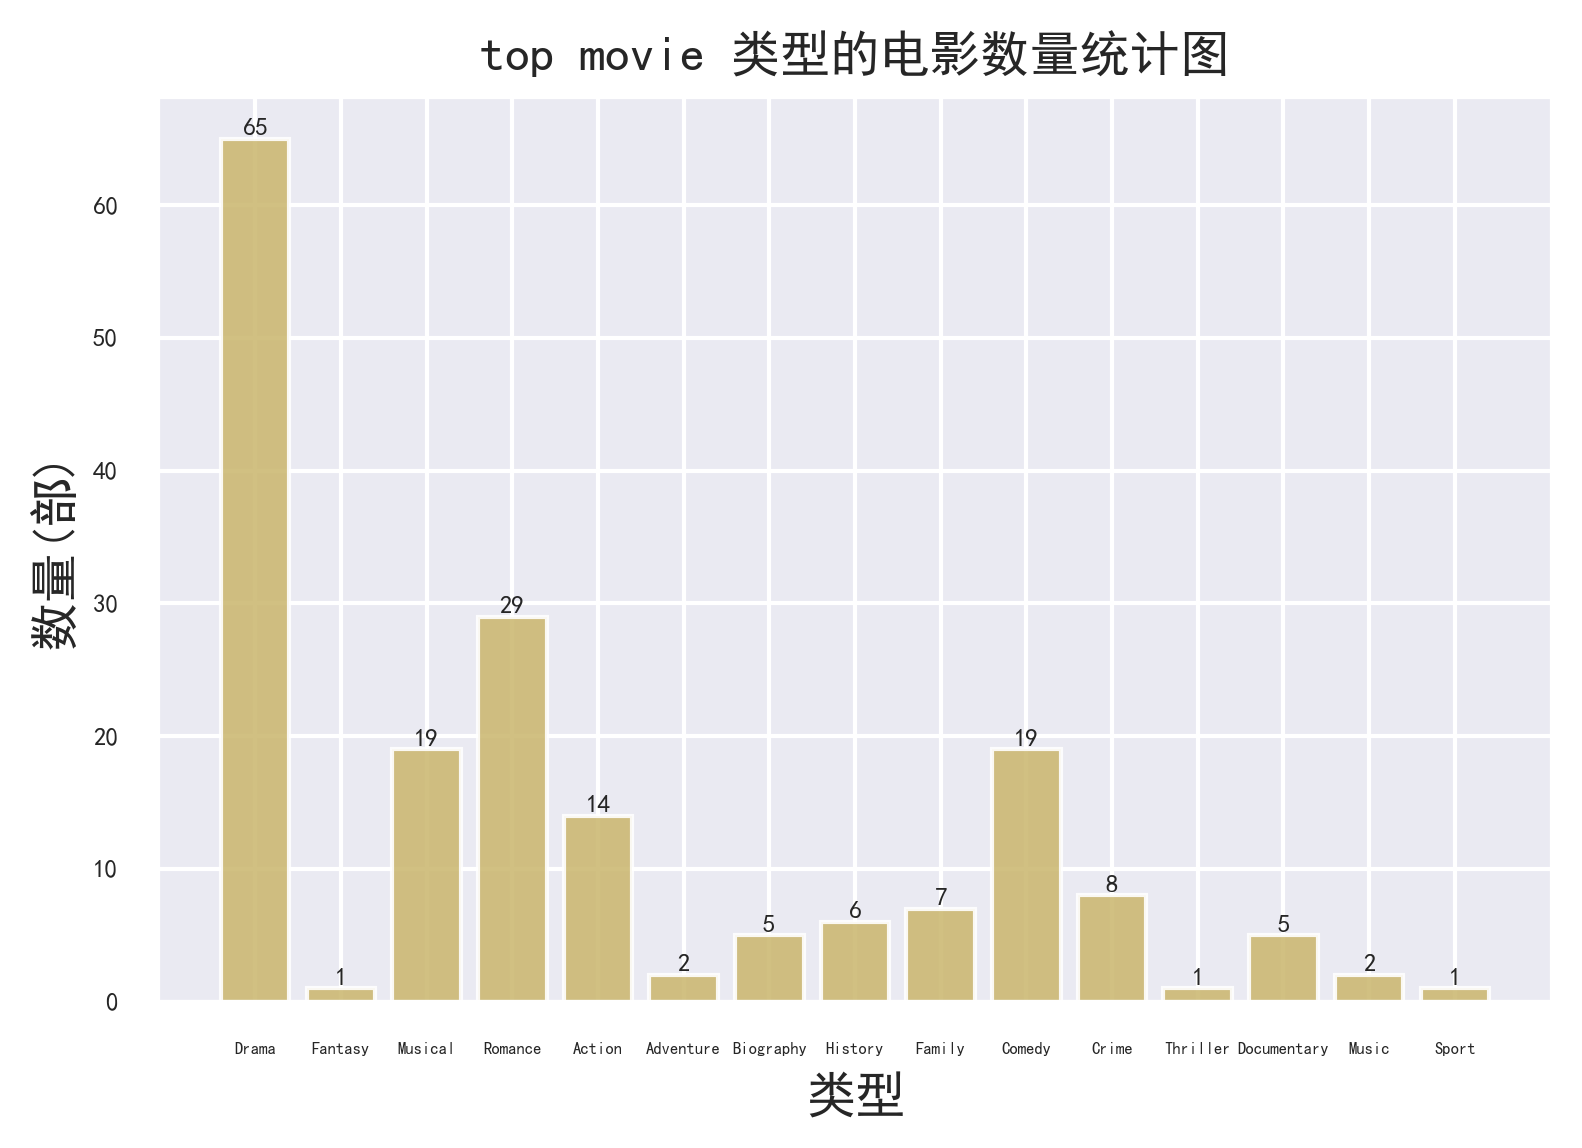

In [15]:
fig= plt.figure(dpi=300) # 图片像素
plt.bar(type_of_top_movies.keys(),type_of_top_movies.values,color='y',alpha=0.9)
for a,b in zip(type_of_top_movies.keys(),type_of_top_movies.values):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=6)
plt.title("top movie 类型的电影数量统计图")
plt.xticks(size=4)
plt.yticks(size=6)
plt.xlabel("类型")
plt.ylabel("数量(部)")
plt.savefig("top_movie类型的电影数量.jpg")

## 不同类型电影的数量

In [16]:
type_of_movies=dict() # 获得电影的类型及其相应的电影数量
for ty in metadata['Genre'].values:
    ls=ty.split(', ')
    for i in ls:
        if i in type_of_movies.keys():
            type_of_movies[i]+=1
        else:
            type_of_movies[i]=1
type_of_movies=pd.Series(type_of_movies)

In [17]:
type_of_movies

Drama          3796
Comedy         1344
Romance        1380
Musical         412
War              33
Horror          202
Mystery         304
Thriller        679
Action         1686
Crime           875
History          99
Adventure       277
Sci-Fi           32
Sport            40
Biography       115
Family          416
Fantasy         146
Documentary      48
Music            53
Animation        40
News              1
Western           1
dtype: int64

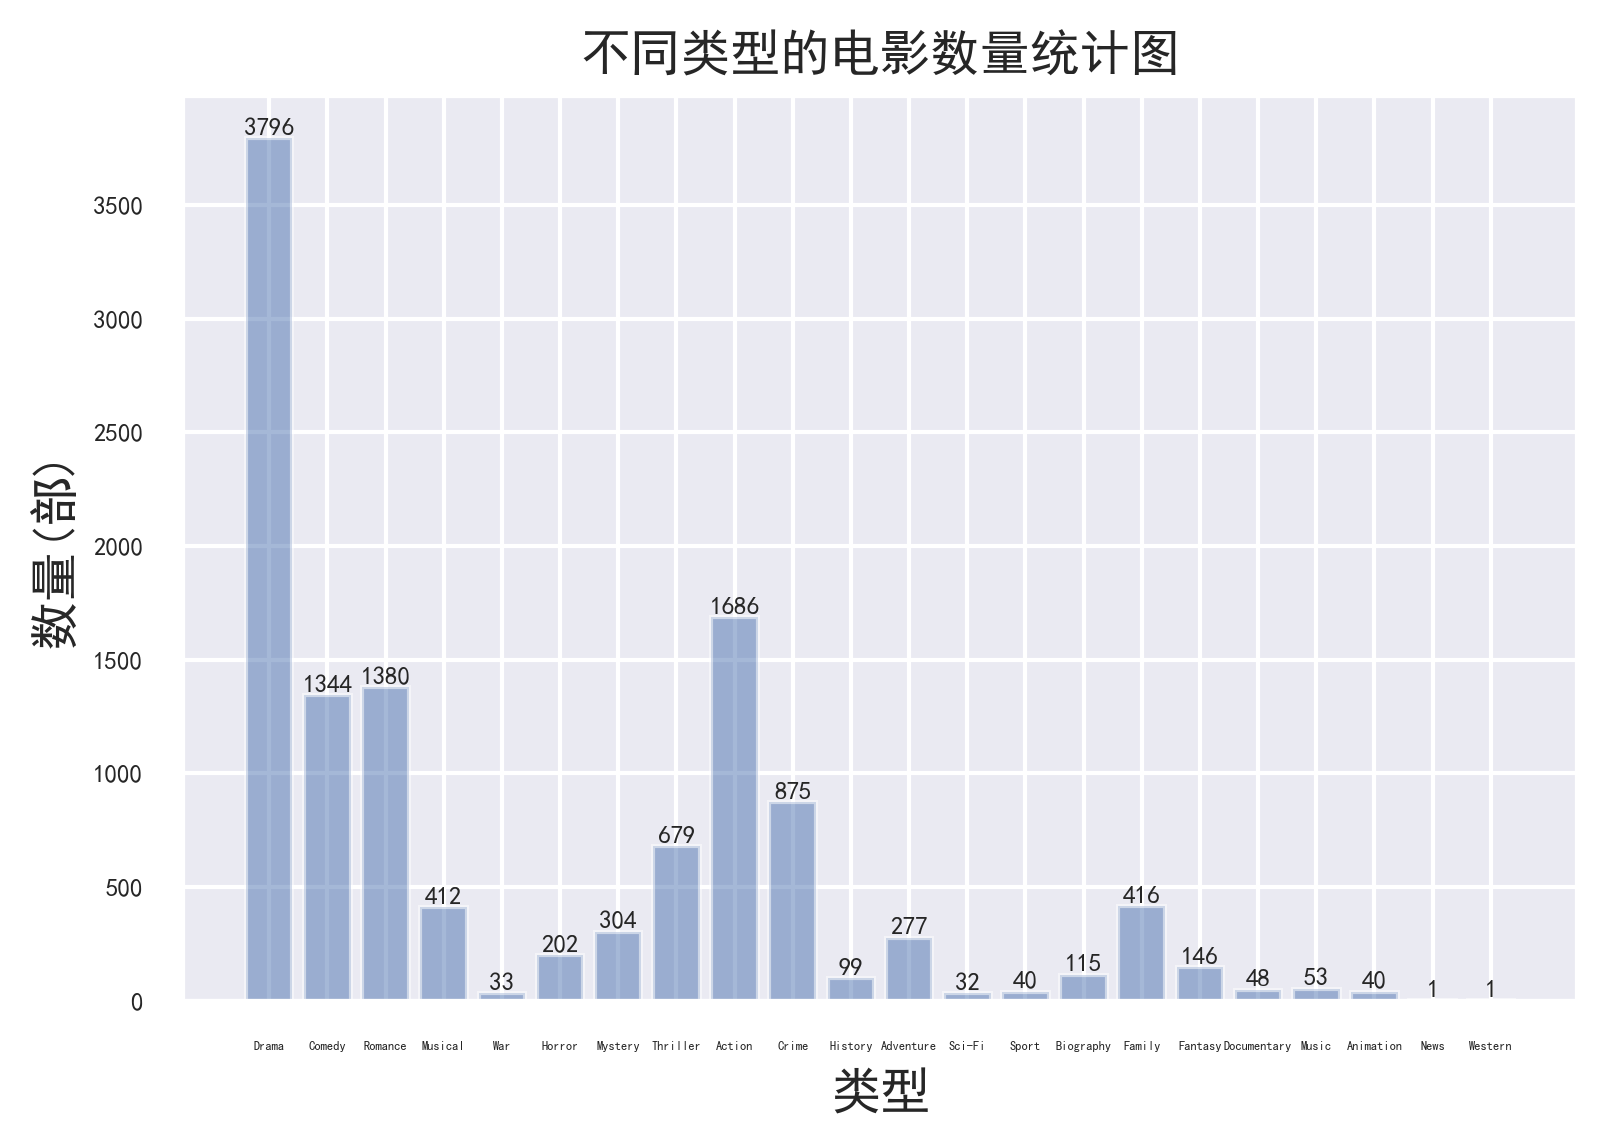

In [18]:
fig= plt.figure(dpi=300) # 图片像素
plt.bar(type_of_movies.keys(),type_of_movies.values,color='b',alpha=0.5)
for a,b in zip(type_of_movies.keys(),type_of_movies.values):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=6)
plt.title("不同类型的电影数量统计图")
plt.xticks(size=3)
plt.yticks(size=6)
plt.xlabel("类型")
plt.ylabel("数量(部)")
plt.savefig("不同类型的电影数量.jpg")

In [19]:
# from pyecharts import options as opts
# from pyecharts.charts import Pie,Page
# pie =(
#     Pie()
#     .add('',[list(z) for z in zip(type_of_movies.keys(),type_of_movies.values)])
#     .set_global_opts(title_opts=opts.TitleOpts(title="不同类型电影数量饼图"))
#     .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}%"))
# )
# pie.render_notebook()

## 不同时长和电影评分和投票之间的关系

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


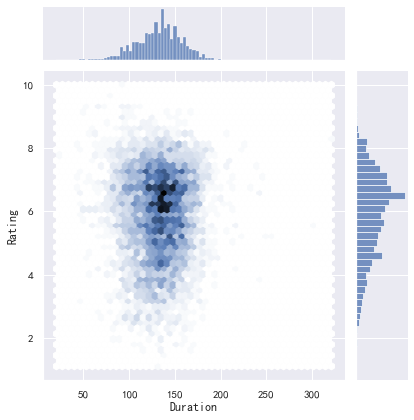

In [20]:
sns.axes_style('white')
sns_plot=sns.jointplot('Duration','Rating',data=metadata,kind='hex')
sns_plot.savefig('时长和评分关系图.jpg')

In [21]:
metadata_1=metadata.copy()

def arounds(s):
    return (s//10+(s%10>=5))*10

metadata_1['Duration']=metadata_1['Duration'].apply(arounds)

In [22]:
dur_by=metadata_1.groupby(by='Duration')
durarion_mean={}
for gp,data in dur_by:
    durarion_mean[gp]=data['Rating'].mean()

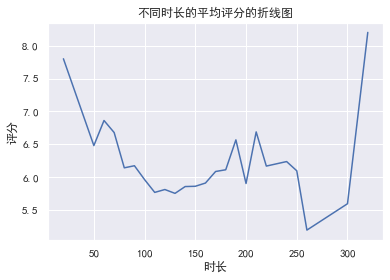

In [26]:
plt.plot(durarion_mean.keys(),durarion_mean.values())
plt.title('不同时长的平均评分的折线图')
plt.xlabel('时长')
plt.ylabel('评分')
plt.savefig('不同时长的平均评分的折线图.jpg')